In [1]:
import os 
import pandas as pd

data=pd.read_csv(r'',encoding='latin1',sep=';')

data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


Read your Titanic dataset as usual: Training set and Testing set Apply decision tree

In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from subprocess import check_output
from sklearn import tree
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
import re
import matplotlib.pyplot as plt

In [3]:
def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    return new_data
train=preprocess_data(data)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,G6,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,G6,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,G6,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,B71,S


In [4]:
columns = ['Pclass','Sex','Age','Fare','Parch','SibSp']

X = train[columns]
y = train.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Plot your decision tree and try to read the tree branches and conclude a prediction manually

In [17]:
clf = DecisionTreeClassifier(max_depth = 3)
clf.fit(X_train,y_train)
print('Accuracy ',clf.score(X_test,y_test))


Accuracy  0.8169491525423729


[Text(837.0, 951.3000000000001, 'X[1] <= 0.5\ngini = 0.471\nsamples = 596\nvalue = [370, 226]'),
 Text(418.5, 679.5, 'X[0] <= 2.5\ngini = 0.38\nsamples = 204\nvalue = [52, 152]'),
 Text(209.25, 407.70000000000005, 'X[2] <= 3.0\ngini = 0.084\nsamples = 114\nvalue = [5, 109]'),
 Text(104.625, 135.89999999999998, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(313.875, 135.89999999999998, 'gini = 0.069\nsamples = 112\nvalue = [4, 108]'),
 Text(627.75, 407.70000000000005, 'X[3] <= 24.808\ngini = 0.499\nsamples = 90\nvalue = [47, 43]'),
 Text(523.125, 135.89999999999998, 'gini = 0.491\nsamples = 74\nvalue = [32, 42]'),
 Text(732.375, 135.89999999999998, 'gini = 0.117\nsamples = 16\nvalue = [15, 1]'),
 Text(1255.5, 679.5, 'X[2] <= 13.0\ngini = 0.306\nsamples = 392\nvalue = [318, 74]'),
 Text(1046.25, 407.70000000000005, 'X[5] <= 2.5\ngini = 0.486\nsamples = 24\nvalue = [10, 14]'),
 Text(941.625, 135.89999999999998, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(1150.875, 135.899999999

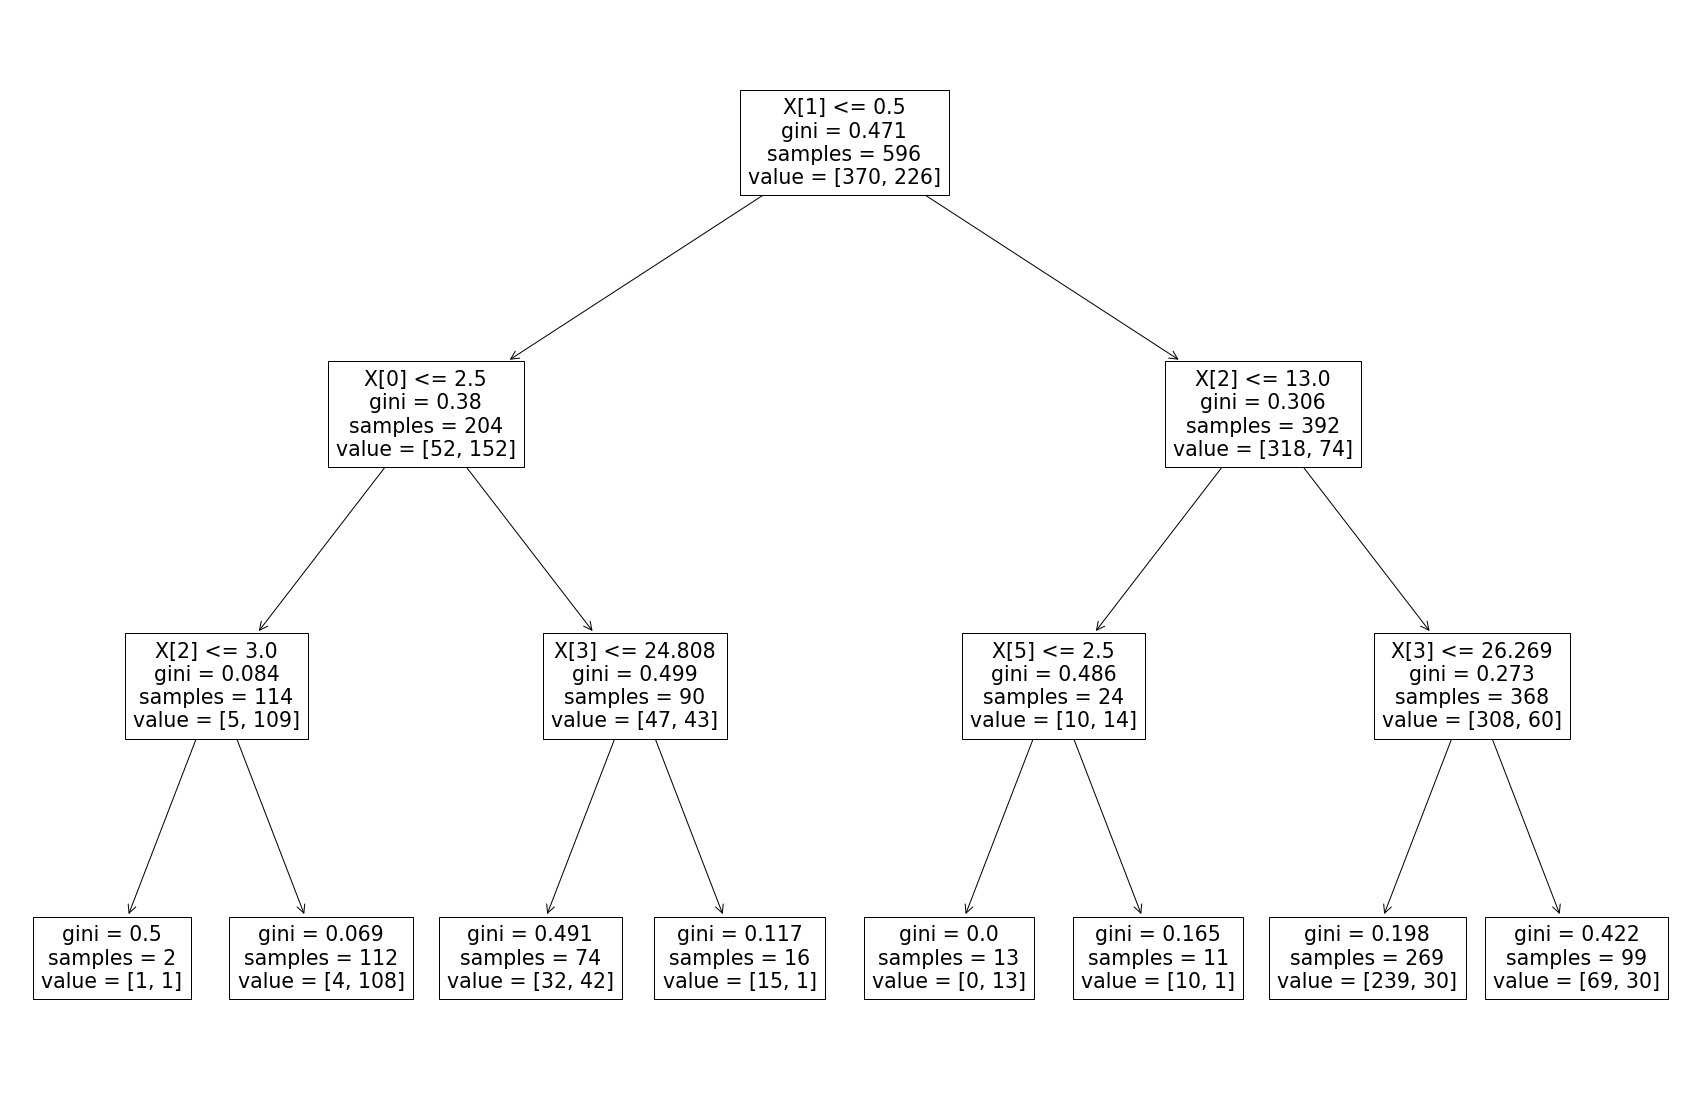

In [18]:
from graphviz import Source
from sklearn import tree
from sklearn.tree import plot_tree
plt.figure(figsize=(30,20))
plot_tree(clf)

In [21]:
#DECISIONB tREE parameter Sex 
columns = ['Pclass','Survived','Age','Fare','Parch','SibSp']

X = train[columns]
y = train.Sex

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf2 = DecisionTreeClassifier(max_depth = 3)
clf2.fit(X_train,y_train)
print('Accuracy ',clf2.score(X_test,y_test))

Accuracy  0.7762711864406779


[Text(837.0, 951.3000000000001, 'X[1] <= 0.5\ngini = 0.45\nsamples = 596\nvalue = [204, 392]'),
 Text(418.5, 679.5, 'X[4] <= 1.5\ngini = 0.242\nsamples = 370\nvalue = [52, 318]'),
 Text(209.25, 407.70000000000005, 'X[5] <= 0.5\ngini = 0.185\nsamples = 340\nvalue = [35, 305]'),
 Text(104.625, 135.89999999999998, 'gini = 0.131\nsamples = 269\nvalue = [19, 250]'),
 Text(313.875, 135.89999999999998, 'gini = 0.349\nsamples = 71\nvalue = [16, 55]'),
 Text(627.75, 407.70000000000005, 'X[3] <= 181.525\ngini = 0.491\nsamples = 30\nvalue = [17, 13]'),
 Text(523.125, 135.89999999999998, 'gini = 0.466\nsamples = 27\nvalue = [17, 10]'),
 Text(732.375, 135.89999999999998, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(1255.5, 679.5, 'X[3] <= 56.712\ngini = 0.44\nsamples = 226\nvalue = [152, 74]'),
 Text(1046.25, 407.70000000000005, 'X[3] <= 56.198\ngini = 0.475\nsamples = 167\nvalue = [102, 65]'),
 Text(941.625, 135.89999999999998, 'gini = 0.468\nsamples = 163\nvalue = [102, 61]'),
 Text(1150.875

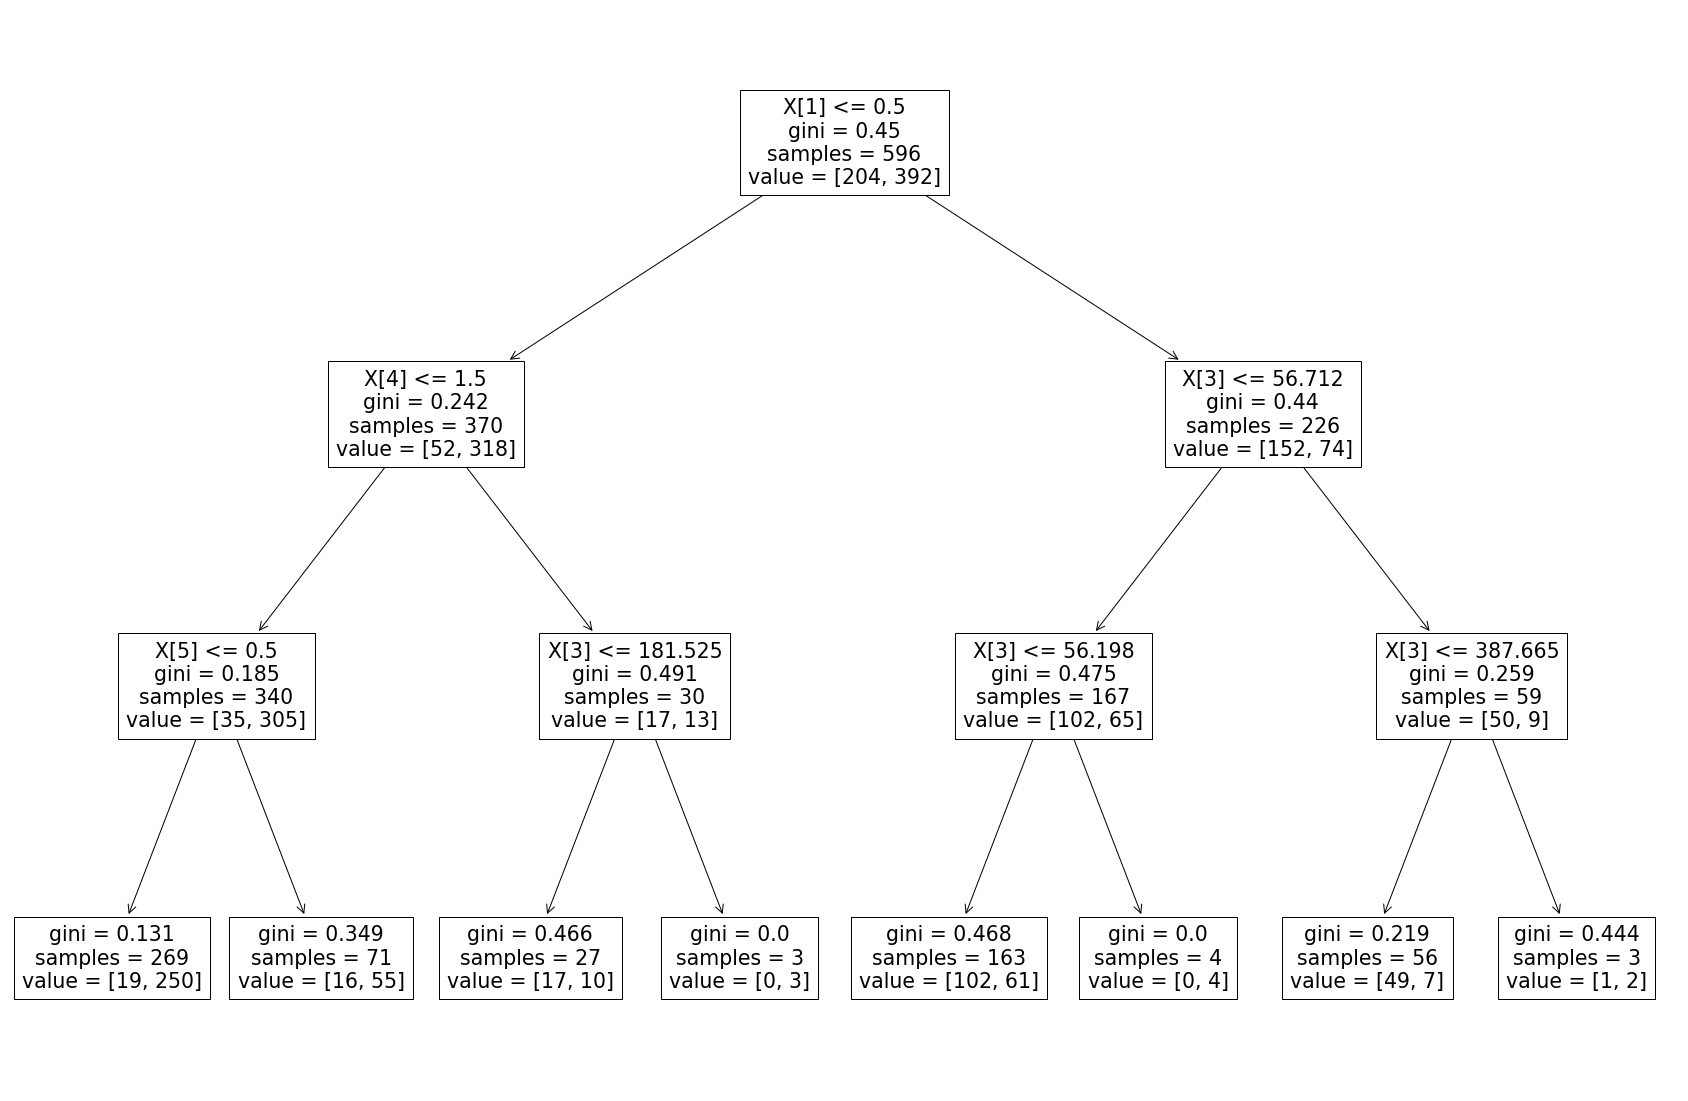

In [22]:
from graphviz import Source
from sklearn import tree
from sklearn.tree import plot_tree
plt.figure(figsize=(30,20))
plot_tree(clf2)

In [23]:
#parameter Parch 
columns = ['Pclass','Sex','Age','Fare','Survived','SibSp']

X = train[columns]
y = train.Parch

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


clf3 = DecisionTreeClassifier(max_depth = 3)
clf3.fit(X_train,y_train)
print('Accuracy ',clf2.score(X_test,y_test))

Accuracy  0.5830508474576271


[Text(708.2307692307693, 951.3000000000001, 'X[2] <= 11.5\ngini = 0.398\nsamples = 596\nvalue = [452, 85, 46, 5, 3, 4, 1]'),
 Text(257.53846153846155, 679.5, 'X[3] <= 19.892\ngini = 0.493\nsamples = 41\nvalue = [0, 23, 18, 0, 0, 0, 0]'),
 Text(128.76923076923077, 407.70000000000005, 'gini = 0.0\nsamples = 11\nvalue = [0, 11, 0, 0, 0, 0, 0]'),
 Text(386.3076923076923, 407.70000000000005, 'X[2] <= 8.5\ngini = 0.48\nsamples = 30\nvalue = [0, 12, 18, 0, 0, 0, 0]'),
 Text(257.53846153846155, 135.89999999999998, 'gini = 0.499\nsamples = 25\nvalue = [0, 12, 13, 0, 0, 0, 0]'),
 Text(515.0769230769231, 135.89999999999998, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 5, 0, 0, 0, 0]'),
 Text(1158.923076923077, 679.5, 'X[3] <= 14.254\ngini = 0.322\nsamples = 555\nvalue = [452, 62, 28, 5, 3, 4, 1]'),
 Text(901.3846153846155, 407.70000000000005, 'X[5] <= 3.0\ngini = 0.035\nsamples = 280\nvalue = [275, 3, 2, 0, 0, 0, 0]'),
 Text(772.6153846153846, 135.89999999999998, 'gini = 0.028\nsamples = 279\nvalue =

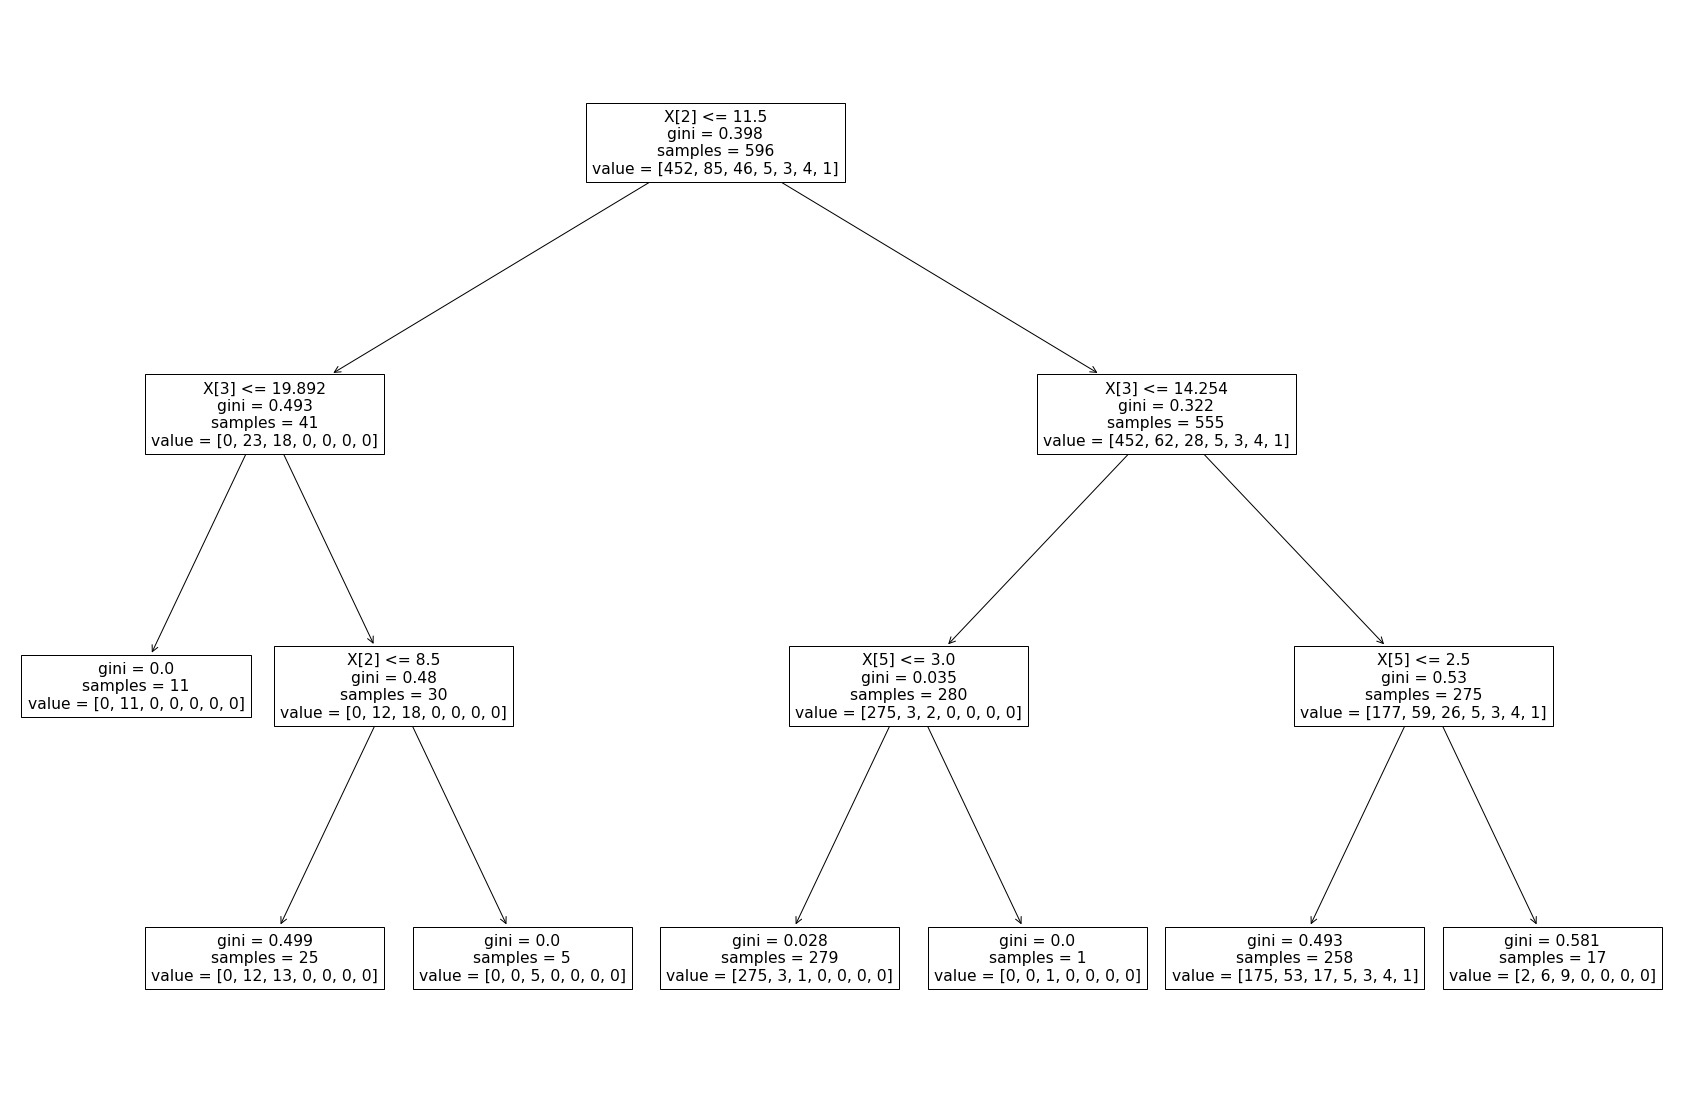

In [24]:
from graphviz import Source
from sklearn import tree
from sklearn.tree import plot_tree
plt.figure(figsize=(30,20))
plot_tree(clf3)

the Best parameter in Tree decision is Survived which have the high accuracy 

In [26]:
# random Forest 
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #Importing Random For-est Classifier
from sklearn import metrics  # Importing metrics to test accuracy


X = train[columns]
y = train.Survived
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.3) #splitting data with test size of 30%

clf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 1.0


In [28]:
# random Forest 
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #Importing Random For-est Classifier
from sklearn import metrics  # Importing metrics to test accuracy
columns = ['Pclass','Sex','Age','Fare','Parch','SibSp']

X = train[columns]
y = train.Survived


x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.3) #splitting data with test size of 30%

clf4=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees
clf4.fit(x_train, y_train)  #Training our model
y_pred=clf4.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.8208955223880597


In [40]:
# random Forest SEX
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #Importing Random For-est Classifier
from sklearn import metrics  # Importing metrics to test accuracy
columns = ['Pclass','Survived','Age','Fare','Parch','SibSp']

X = train[columns]
y = train.Sex


x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.3) #splitting data with test size of 30%

clf5=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees
clf5.fit(x_train, y_train)  #Training our model
y_pred=clf5.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.7686567164179104
